# Week 6. In-Class Practice

應用 PCA 和 Kmeans Clustering 於財務報表的章節上。

### 引入library並讀進105、106年的華航營運概況、財務概況、報表附註

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline
import sys
sys.path.insert(0, '../modules')

from fintextmin import *

In [2]:
op_text106 = read_text("./dataset/ChinaAirline106Operation.txt")
fin_text106 = read_text("./dataset/ChinaAirline106Financial.txt")
note_text106 = read_text("./dataset/ChinaAirline106IndivNotes.txt")

op_text105 = read_text("./dataset/ChinaAirline105Operation.txt")
fin_text105 = read_text("./dataset/ChinaAirline105Financial.txt")
note_text105 = read_text("./dataset/ChinaAirline105IndivNotes.txt")

### 完成 tf-idf 矩陣作為各文本的特徵

In [3]:
text_list = [op_text106, fin_text106, note_text106, op_text105, fin_text105, note_text105]
text_name = ['op_text106', 'fin_text106', 'note_text106', 'op_text105', 'fin_text105', 'note_text105']
text_label = ['op_text', 'fin_text', 'note_text', 'op_text', 'fin_text', 'note_text']
cwd = count_words_in_documents(text_list, text_name,
                               stopwords=['０','１','２','３','４','５','６','７','８','９'],
                               puncs=set_puncs('-－—─'),
                               stop_pattern='[A-Za-z0-9]+')
wfm = create_word_frequency_matrix(cwd)
df_tfidf = evaluate_tfidf(wfm)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 2.209 seconds.
Prefix dict has been built succesfully.


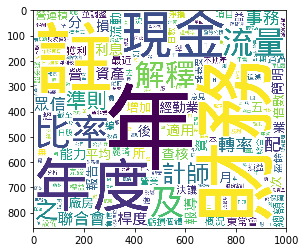

In [4]:
plot_tfidf_wordcloud(df_tfidf, font_path=r'/usr/share/fonts/truetype/wqy/wqy-microhei.ttc')

In [5]:
df_tfidf.index = text_name
df_tfidf

,×,一,一中,一事,一個,一個體,一假設,一同,一商機,一季,...,暴,行,降,見,益,福,精,飯,館,﻿
op_text106,0.012789,0.017308,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.003462
fin_text106,0.008970,0.029136,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.004856
note_text106,0.000000,0.029491,0.000000,0.001329,0.000000,0.001329,0.001329,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000590
op_text105,0.000000,0.033988,0.000643,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001287,0.107451,0.005791,0.007078,0.230988,0.02831,0.007721,0.004504,0.00193,0.000286
fin_text105,0.000000,0.010255,0.000000,0.000000,0.003157,0.000000,0.000000,0.003157,0.003157,0.003157,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.001709
note_text105,0.000000,0.012214,0.000000,0.000000,0.003223,0.000000,0.000000,0.003223,0.003223,0.003223,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.001745


### 以 Principle Component Analysis (PCA) 降維
PCA執行後可能將各群之間更為分開，但會損失資訊

In [6]:
pca = PCA(n_components=3)
pca_df_tfidf = pca.fit_transform(df_tfidf)
pca_df_tfidf

array([[ 0.64780956, -0.2480568 , -0.08123513],
       [ 0.61773774, -0.18961734, -0.12146052],
       [-0.02958016,  0.13117849,  0.65570099],
       [-0.05137907,  0.85646044, -0.22426538],
       [-0.59805087, -0.272456  , -0.11849768],
       [-0.58653721, -0.27750879, -0.11024229]])

### 透過Kmeans Clustering方法進行分群

In [7]:
kmeans = KMeans(n_clusters = 3)

#Compute cluster centers and predict cluster indices
tfidf_clustered = kmeans.fit_predict(pca_df_tfidf)

同樣的章節以相同的形狀表示。分群結果以顏色表示。在這個範例中，分群演算法沒有把同樣的章節分在一起，可能是因為文本過少，也沒有清理文本內容的緣故。

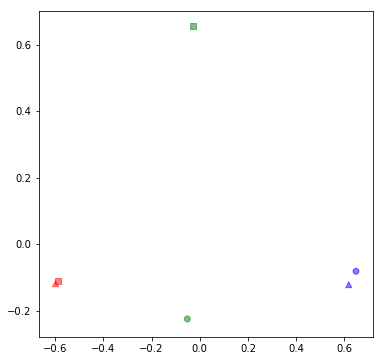

In [8]:
label_color_map = {0:'r', 1:'g', 2: 'b'}
label_color = [label_color_map[l] for l in tfidf_clustered]
label_marker_map = {'op_text':'o', 'fin_text': '^', 'note_text': 's'}

op_slice = slice(0, 4, 3)
fin_slice = slice(1, 5, 3)
note_slice = slice(2, 6, 3)


plt.figure(figsize = (6,6))
plt.scatter(pca_df_tfidf[op_slice,0],pca_df_tfidf[op_slice,2],
            marker=label_marker_map['op_text'],
            c=label_color[op_slice], 
            alpha = 0.5) # op_text
plt.scatter(pca_df_tfidf[fin_slice,0],pca_df_tfidf[fin_slice,2],
            marker=label_marker_map['fin_text'],
            c=label_color[fin_slice], 
            alpha = 0.5) # fin_text
plt.scatter(pca_df_tfidf[note_slice,0],pca_df_tfidf[note_slice,2],
            marker=label_marker_map['note_text'],
            c=label_color[note_slice], 
            alpha = 0.5) # op_text
plt.show()